In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             193 non-null    int64  
 1   Country Name                            193 non-null    object 
 2   E-Government Rank                       193 non-null    int64  
 3   E-Government Index                      193 non-null    float64
 4   E-Participation Index                   193 non-null    float64
 5   Online Service Index                    193 non-null    float64
 6   Human Capital Index                     193 non-null    float64
 7   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ KB


In [4]:
egdi_mundo = egdi.melt(
    value_vars=[
        'E-Government Index',
         'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ], 
    var_name='Indices', 
    value_name='Valores_Mundo'
).groupby('Indices')['Valores_Mundo'].median()

In [5]:
egdi_brasil = egdi[egdi['Country Name'].isin(['Brazil'])].reset_index(drop=True)

In [6]:
egdi_brasil = egdi_brasil.melt(
    value_vars=[
        'E-Government Index',
         'E-Participation Index',
        'Online Service Index',
        'Human Capital Index',
        'Telecommunication Infrastructure Index'
    ], 
    var_name='Indices', 
    value_name='Valores_BR'
)

In [7]:
df = pd.merge(egdi_mundo, egdi_brasil, on='Indices')

In [8]:
df.head()

,Indices,Valores_Mundo,Valores_BR
0,E-Government Index,0.66776,0.84026
1,E-Participation Index,0.46580,0.86300
2,Human Capital Index,0.69557,0.80768
3,Online Service Index,0.57598,0.90631
4,Telecommunication Infrastructure Index,0.78511,0.80685


In [9]:
df = df.melt(
    id_vars='Indices',
    value_vars=[
        'Valores_Mundo',
        'Valores_BR'
    ], 
    var_name='Valores', 
    value_name='Pontuacao'
)

In [10]:
df.head(10)

,Indices,Valores,Pontuacao
0,E-Government Index,Valores_Mundo,0.66776
1,E-Participation Index,Valores_Mundo,0.46580
2,Human Capital Index,Valores_Mundo,0.69557
3,Online Service Index,Valores_Mundo,0.57598
4,Telecommunication Infrastructure Index,Valores_Mundo,0.78511
5,E-Government Index,Valores_BR,0.84026
6,E-Participation Index,Valores_BR,0.86300
7,Human Capital Index,Valores_BR,0.80768
8,Online Service Index,Valores_BR,0.90631
9,Telecommunication Infrastructure Index,Valores_BR,0.80685


In [11]:
df.loc[df['Pontuacao'] >= 0.8, 'Regiao'] = 'Brasil'
df.loc[df['Pontuacao'] < 0.8, 'Regiao'] = 'Mundo'


In [12]:
df.head(10)

,Indices,Valores,Pontuacao,Regiao
0,E-Government Index,Valores_Mundo,0.66776,Mundo
1,E-Participation Index,Valores_Mundo,0.46580,Mundo
2,Human Capital Index,Valores_Mundo,0.69557,Mundo
3,Online Service Index,Valores_Mundo,0.57598,Mundo
4,Telecommunication Infrastructure Index,Valores_Mundo,0.78511,Mundo
5,E-Government Index,Valores_BR,0.84026,Brasil
6,E-Participation Index,Valores_BR,0.86300,Brasil
7,Human Capital Index,Valores_BR,0.80768,Brasil
8,Online Service Index,Valores_BR,0.90631,Brasil
9,Telecommunication Infrastructure Index,Valores_BR,0.80685,Brasil


C:\Users\lazar\AppData\Local\Temp\ipykernel_1212\1959094802.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['EGDI', 'EPI', 'HCI', 'OSI', 'TII'])


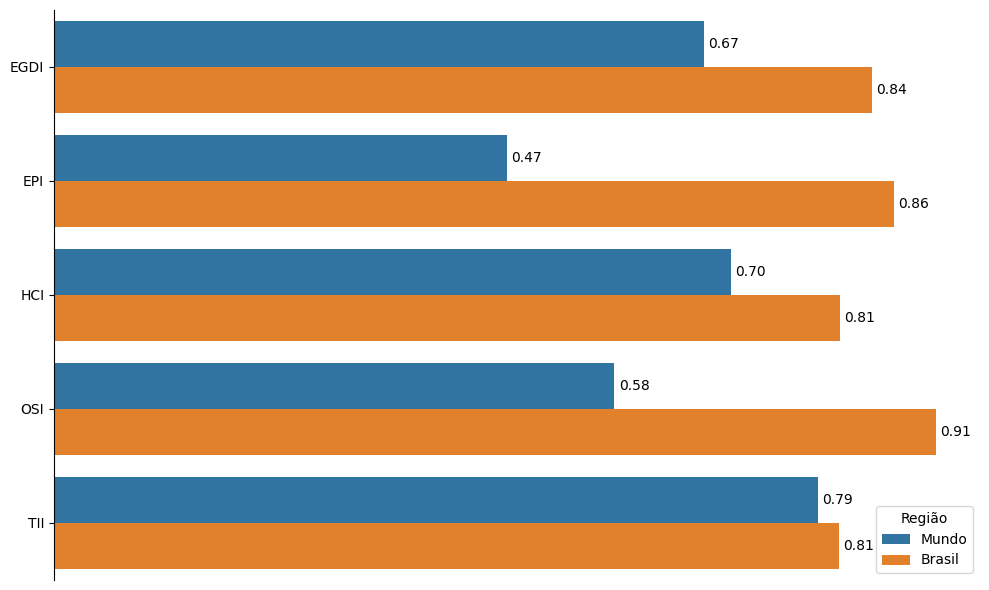

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_container = sns.barplot(data=df, x='Pontuacao', y='Indices', hue='Regiao', ax=ax)

for container in bar_container.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['EGDI', 'EPI', 'HCI', 'OSI', 'TII'])
ax.xaxis.set_visible(False)
sns.despine(bottom=True)
plt.tight_layout()
plt.legend(title='Região')
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_egdi_brasil_mundo.png', dpi=300, bbox_inches='tight')
plt.show()